Módulo 4. Model development
Alumno: Enrique Ricardo García Hernández
Matrícula: A01315428
Fecha: 1 Nov 2022

Objetivos del módulo
1. Regresión lineal y múltiple
2. Evaluación y visualización del modelo
3. Regresión polinomial y *pipeline*
4. R-cuadrada y MSE para evaluación
5. Predicción y toma de decisiones

In [65]:
#Estadística descriptiva (previo a la realización de modelos más eleborados)
import pandas as pd
import numpy as np
ruta="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df=pd.read_csv(ruta,header=None)
#Actualizar los nombres de las columnas
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num_of_doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height',
         'curb-weight','engine-type','num_of-cylinder','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num_of_doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [66]:
df['price'] = pd.to_numeric(df['price'], errors='coerce') #cambiamos de string a numérica y los variables "extraños" los dejamos como NaN
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce') #cambiamos de string a numérica y los variables "extraños" los dejamos como NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') #cambiamos de string a numérica y los variables "extraños" los dejamos como NaN

In [67]:
#Cálculo de estadísticos básicos
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [70]:
meanp=df['price'].mean()
df['price']=df['price'].replace(np.nan,meanp) #Cambia los missing values por el valor de la media que calculamos antes

In [74]:
X=df['highway-mpg']
y=df['price']

In [75]:
#highway-mpg es la variable independiente
#price es la variable dependiente
X=df[['highway-mpg']]
y=df['price']

#Ajustando una regresión lineal
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [77]:
lm.intercept_

37470.66014138312

In [78]:
lm.coef_

array([-789.02661986])

In [ ]:
#Ecuación
#price=37470-789.026*high-mpg

In [129]:
#Múltiple regresión lineal
z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

for i in ['horsepower','curb-weight','engine-size','highway-mpg']:
  df[i]=df[i].replace(np.nan,df[i].mean())
  print(df[i].describe())

count    205.000000
mean     104.256158
std       39.519211
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64
count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb-weight, dtype: float64
count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64
count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64


In [130]:
lm.fit(z,df['price'])

LinearRegression()

In [131]:
lm.coef_

array([ 18.12178086,   3.80596513, 101.121117  , -65.10968116])

In [132]:
lm.intercept_

-9239.379970934518

In [ ]:
#La ecuación queda:
#price=-9239.38+18.12*horsepower+3.80*curb-weight+101.12*engine-size-65.11*highway-mpg

In [133]:
yhat=lm.predict(z)

(0.0, 48112.11465755887)

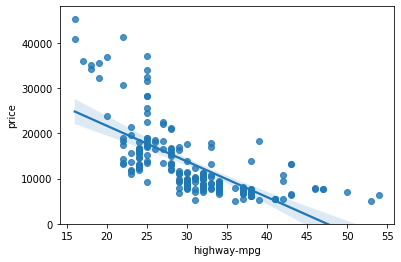

In [134]:
#Evaluación del modelo
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


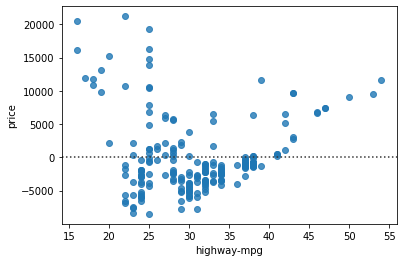

In [105]:
#Gráfica de la distribución de los residuales
sns.residplot(df['highway-mpg'],df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


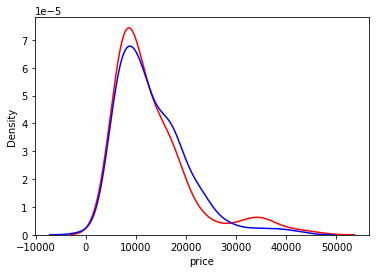

In [106]:
#distribution plot entre el valor real de Price y el valor estimado
ax1=sns.distplot(df['price'],hist=False,color='r',label="valor actual")
ax2=sns.distplot(yhat,hist=False,color='b',label="valor estimado",ax=ax1)

In [114]:
#Regresiones polinomiales con más de 1 parámetro
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [121]:
input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe=Pipeline(input)

In [124]:
#Evaluación de ajuste de los modelos
#MSE=Mean Square Error
#R-cuadrada
from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'],yhat)

13788871.220920242

In [136]:
lm.score(z,df['price'])

0.776210913272399

In [145]:
#Ajustando una regresión lineal
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(df[['highway-mpg']],df['price'])

LinearRegression()

In [146]:
lm.coef_

array([-789.02661986])

In [147]:
lm.intercept_

37470.66014138312

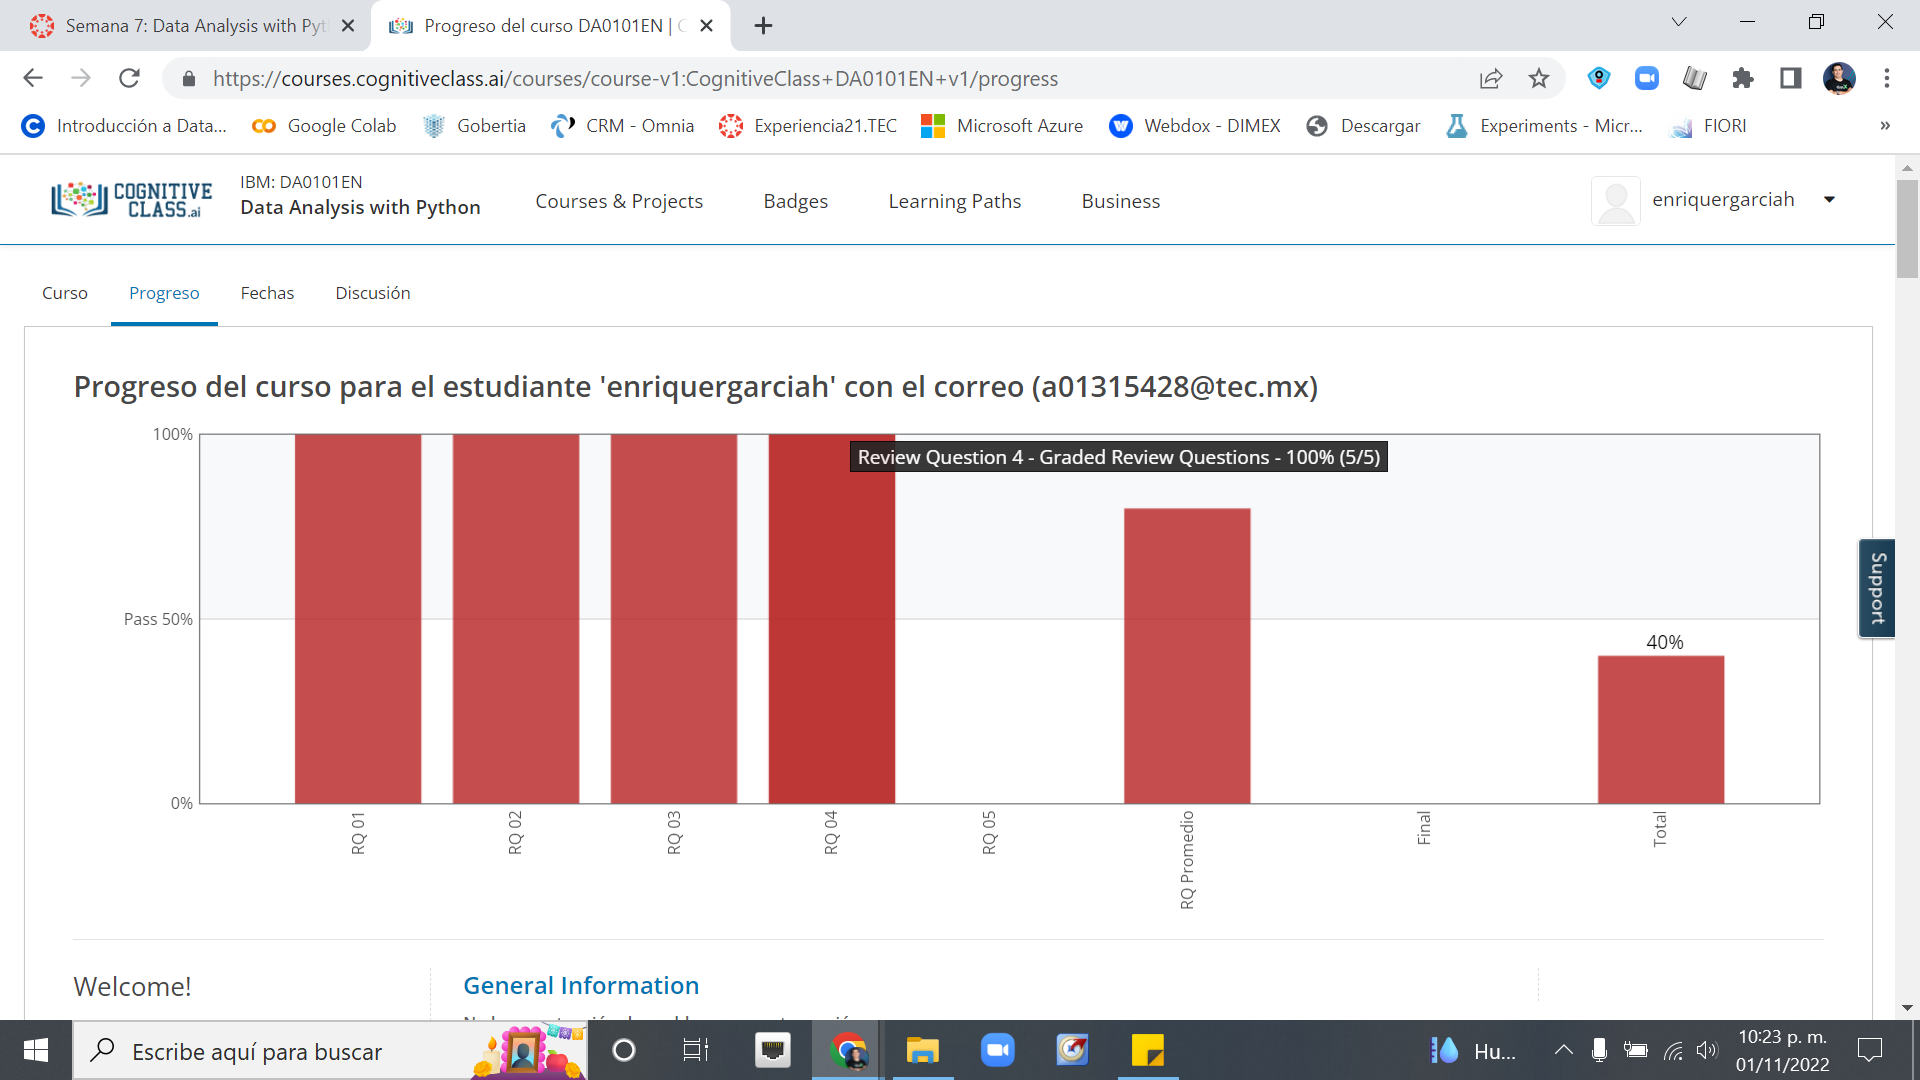